# Ford Gobike 2017 Data Exploratory Analysis


Import all required libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


read the 2017 ford gobike data-set

In [2]:
data = pd.read_csv('2017-fordgobike-tripdata.csv')

## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: duration_sec.

    duration_sec: is the duration of each ride in seconds, my first intuition (or maybe we can say hypothesis) is that, this variable can lead us to many conclusions for better decisions for the company.


## Analysing the properties for customers and subsribers

Another variable in the data-set is differentiating the ride users into two types, **Cusomters** and **Subscribers**.

It will be interesting to see if the mean of ride duration differs in each group, how much difference, what are the trends in each group, so the company can offer different packages and offeres that well-suit each group, in order to achieve maximum user statisfaction and highest income.

In [3]:
# create two subsets of the data-set depending on the user_type
customers = data[data['user_type']=='Customer']
subscribers =  data[data['user_type']=='Subscriber']

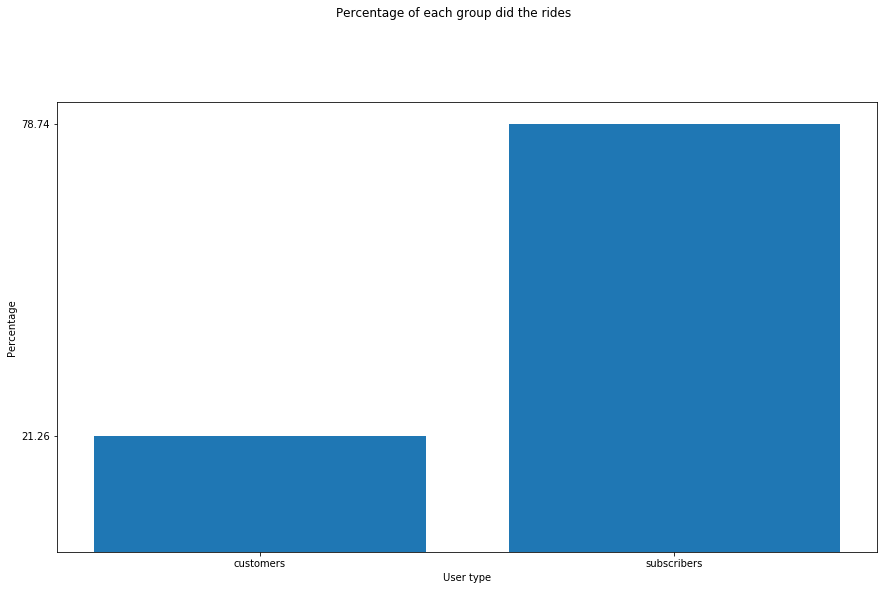

In [6]:
# a list of group names and their percentage
types_numbers = [('customers', customers.shape[0]*100/ data.shape[0]), ('subscribers',subscribers.shape[0]*100/data.shape[0])]
labels, ys = zip(*types_numbers)
xs = np.arange(len(labels)) 
base_color = sb.color_palette()[0]
standard = [14.70, 8.27]
plt.figure(figsize=standard)
plt.bar(xs, ys, align='center' , color  = base_color)
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.ylabel('Percentage')
plt.xlabel('User type')
plt.suptitle('Percentage of each group did the rides', y = 1.04)
plt.show()

The plot says that subscribers are responsible for approxmaitly three quarters of the rides.


In [17]:
# create the duration in minutes column
data['dur_min'] = data['duration_sec'] /  60

# create the duration in hours column
data['dur_hour'] = data['duration_sec'] /  3600

# Duration of the rides for each group

In [21]:
# describtion of the duration in minutes after removal of the highest 1% 
v_99 = data["dur_hour"].quantile(0.99) 
data_filtered = data[data['dur_hour'] <= v_99]

count    514503.000000
mean         13.805712
std          16.307526
min           1.016667
25%           6.333333
50%           9.850000
75%          15.383333
max         188.983333
Name: dur_min, dtype: float64

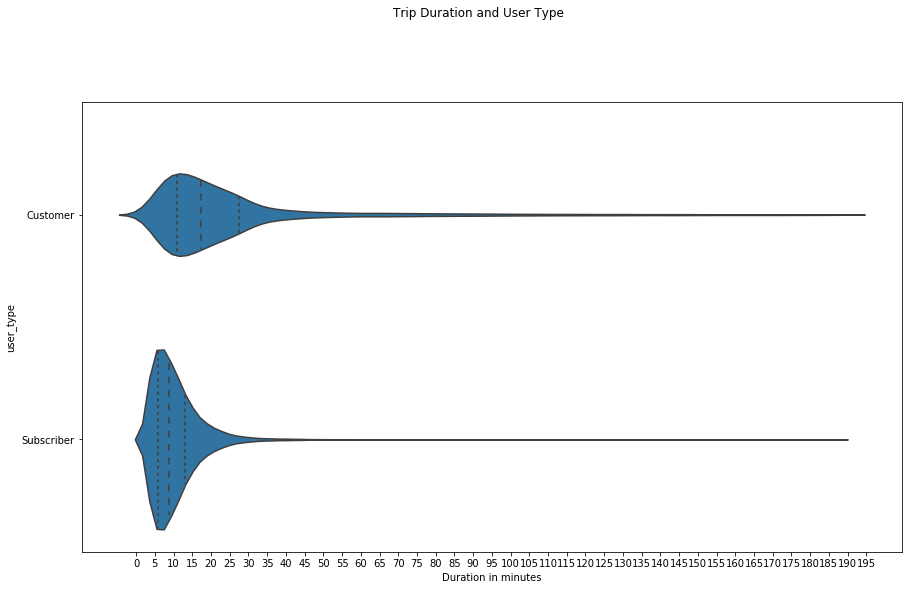

In [22]:
plt.figure(figsize=standard)
sb.violinplot(data = data_filtered, y = 'user_type', x = 'dur_min', color = base_color, inner='quartile')
plt.suptitle('Trip Duration and User Type', y = 1.04)
plt.xlabel('Duration in minutes')
plt.xticks(range(0,200,5))
plt.show()


        - 75% of the customers take the ride for more than 10 mins.
        - 50% of the customers spend between 10 min and 30 mins.
        - 25% of the customers last for more than 30 mins.

# Timing of the rides in each day for subscribers

In [23]:
# Change start_time and end_time to datetime format
data.start_time = pd.to_datetime(data.start_time)
data.end_time = pd.to_datetime(data.end_time)

# Extract dayofweek, hours information from the start_time
data['day']= data['start_time'].dt.strftime('%a')
data['hour']= data['start_time'].dt.hour


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,dur_min,dur_hour,day,hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335.166667,22.252778,Sun,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313.333333,21.888889,Sun,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762.800000,12.713333,Sun,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036.200000,17.270000,Sun,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726.716667,12.111944,Sun,14


Inspect the distribution of the hours when the rides happen

In [ ]:
plt.figure(figsize=standard)
plt.suptitle('Histogram for the start hour of the trips', y = 1.04)
sb.countplot(data = data , x = 'hour', color = base_color);

There are two peaks, at 8 AM and 5 PM. 



 **Hypothesis**
          - maybe the two peaks come from the subcribers who are going to and from work, and that wouldn't be the same case in holidays ?
          
          
To check this hypothesis: 
let's see the distribution of suscribers and customers over the day.

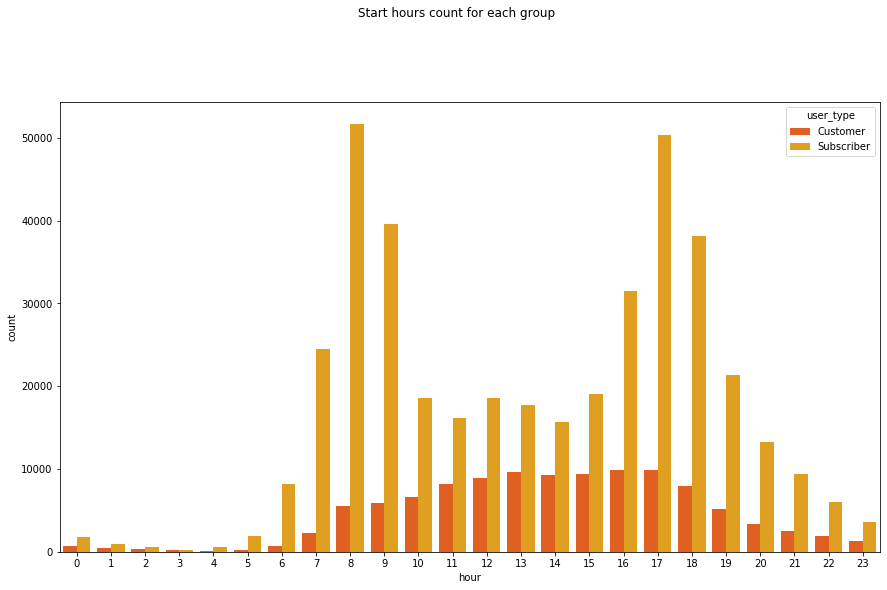

In [25]:
plt.figure(figsize=standard)
plt.suptitle('Start hours count for each group', y = 1.04)
sb.countplot(data = data, x = 'hour', hue = 'user_type', palette = 'autumn''');

As expected, the peaks are coming from subscribers and do not appear in customers side.


Let's further investigate if the two peaks appears for all the week days for the subscribers.

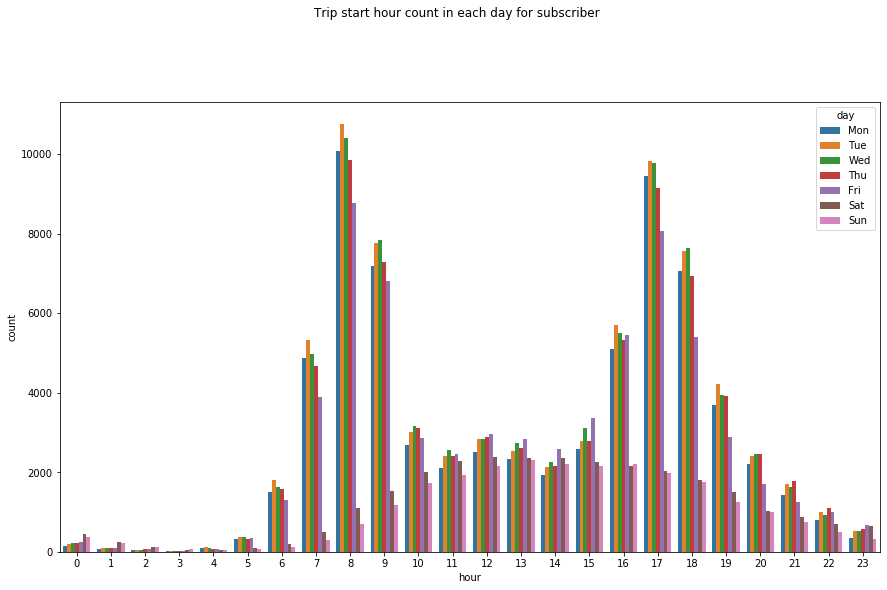

In [26]:
# extract the subscribers only
subscribers = data[data['user_type'] == 'Subscriber']
#define the order of days to be plotted in order
day_order =['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
# plot the subset against hours and days
plt.figure(figsize=standard)
plt.suptitle('Trip start hour count in each day for subscriber', y = 1.04)
sb.countplot(data = subscribers, x = 'hour', hue = 'day', hue_order = day_order);

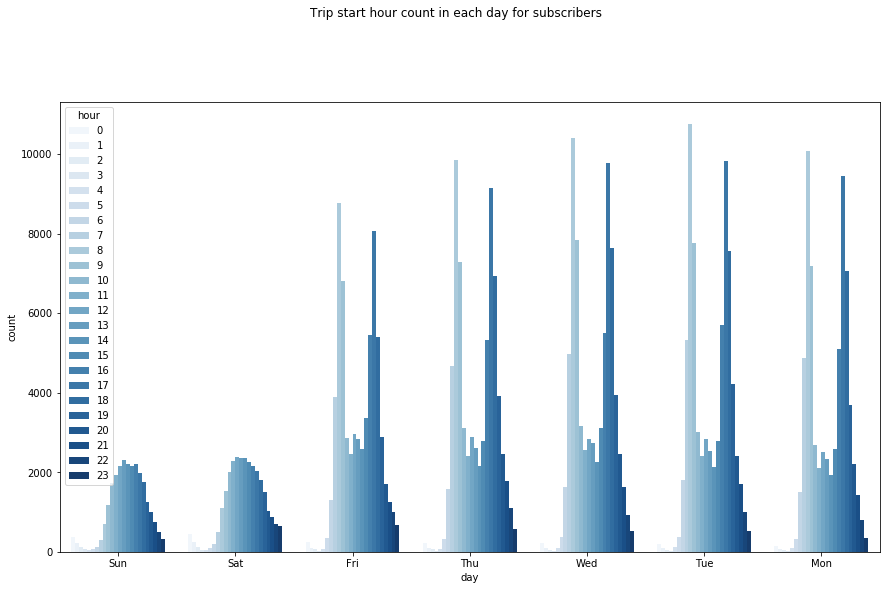

In [27]:
# The same plot with reversing the hour and day, plotting both to see which is better to be presented!
plt.figure(figsize=standard)
plt.suptitle('Trip start hour count in each day for subscribers', y = 1.04)
sb.countplot(data = subscribers, hue = 'hour', x = 'day', palette = 'Blues');

Two peaks appears in all days are not appearing in sundays and saturdays. Mostly the two peaks come from the subcribers who are going to and from work, and its no the same case in holidays. Therfore, we can target people going to work and still not using the bikes with interesting offers.




We can accept the hypothesis    ;).

Now, let's see the distribution of all the rides on the days

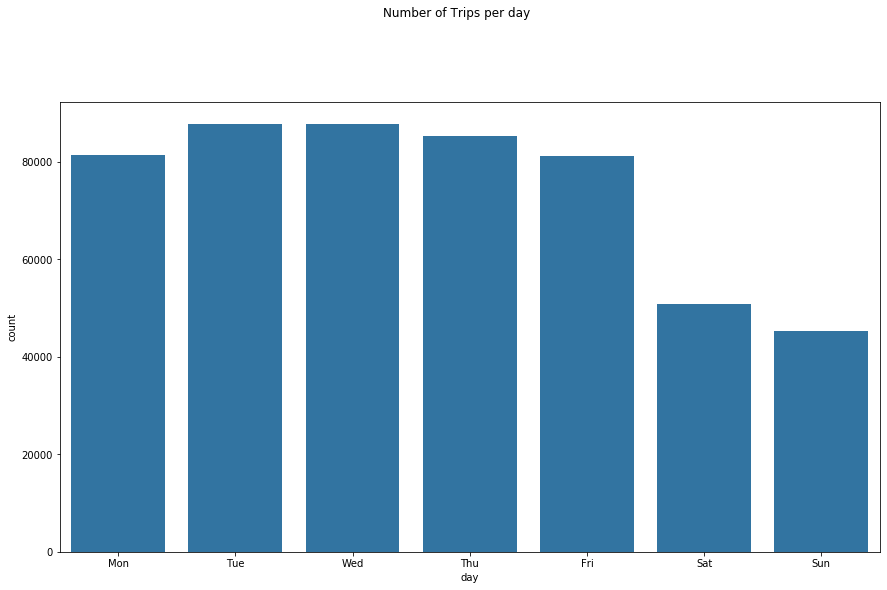

In [28]:
plt.figure(figsize=standard)
plt.suptitle('Number of Trips per day', y = 1.04)
sb.countplot(data = data , x = 'day', color = base_color, order = day_order);

And the distribution of the two groups of the user types in each day.

# Day of the ride for each group


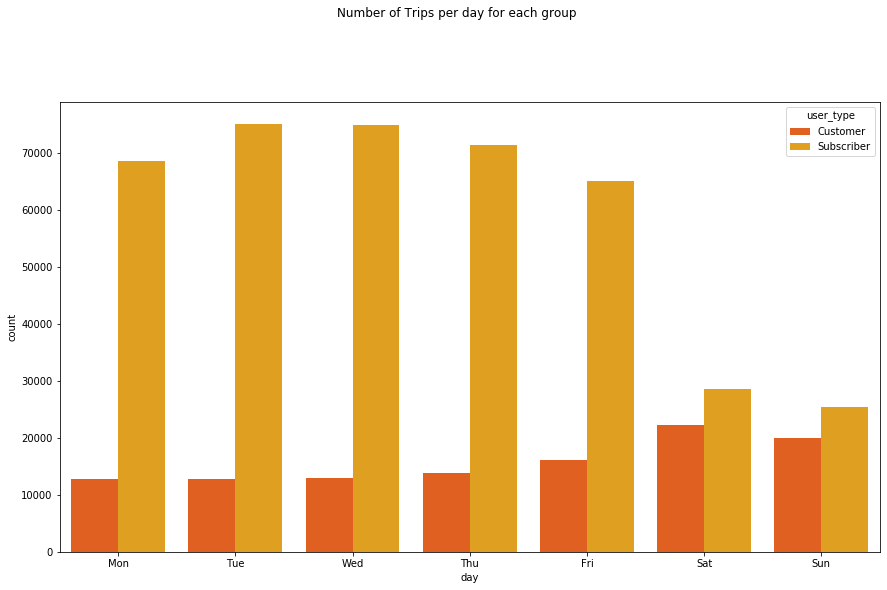

In [29]:
plt.figure(figsize=standard)
plt.suptitle('Number of Trips per day for each group', y = 1.04)
sb.countplot(data = data, x = 'day', hue = 'user_type', palette = 'autumn', order = day_order);

The subscribers are much lower in the holidays as we previously concluded. However, the customers are the highest at holidays. We can make use of this fact and address the customers with special offers for holidays to increase the number of rides.